In [188]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


In [189]:
!pip install sklearn

In [190]:
df = pd.read_csv('6 class csv.csv')

In [191]:
df.head

<bound method NDFrame.head of      Temperature (K)  Luminosity(L/Lo)  Radius(R/Ro)  Absolute magnitude(Mv)  \
0               3068          0.002400        0.1700                   16.12   
1               3042          0.000500        0.1542                   16.60   
2               2600          0.000300        0.1020                   18.70   
3               2800          0.000200        0.1600                   16.65   
4               1939          0.000138        0.1030                   20.06   
..               ...               ...           ...                     ...   
235            38940     374830.000000     1356.0000                   -9.93   
236            30839     834042.000000     1194.0000                  -10.63   
237             8829     537493.000000     1423.0000                  -10.73   
238             9235     404940.000000     1112.0000                  -11.23   
239            37882     294903.000000     1783.0000                   -7.80   

     Star

In [192]:
df.columns

Index(['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)',
       'Absolute magnitude(Mv)', 'Star type', 'Star color', 'Spectral Class'],
      dtype='object')

In [193]:
df.shape

(240, 7)

In [194]:
df.dtypes

Temperature (K)             int64
Luminosity(L/Lo)          float64
Radius(R/Ro)              float64
Absolute magnitude(Mv)    float64
Star type                   int64
Star color                 object
Spectral Class             object
dtype: object

In [195]:
df.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


In [196]:
df.isna().sum()

Temperature (K)           0
Luminosity(L/Lo)          0
Radius(R/Ro)              0
Absolute magnitude(Mv)    0
Star type                 0
Star color                0
Spectral Class            0
dtype: int64

In [197]:
sns.countplot?

In [198]:
type(df['Star type'][0])

numpy.int64

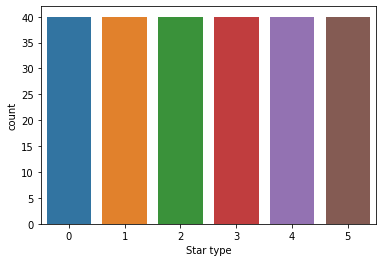

In [199]:
ax = sns.countplot(x="Star type", data=df)

In [200]:
df['Star type'].value_counts()

0    40
1    40
2    40
3    40
4    40
5    40
Name: Star type, dtype: int64

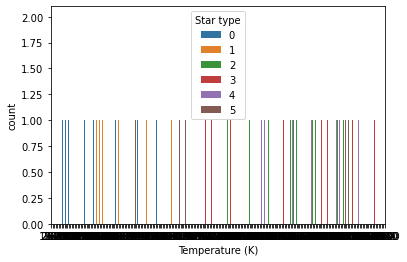

In [201]:
ax = sns.countplot(x = 'Temperature (K)', data = df, hue = 'Star type')

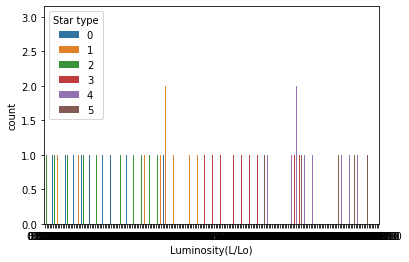

In [202]:
ax = sns.countplot(x = 'Luminosity(L/Lo)', data = df, hue = 'Star type')

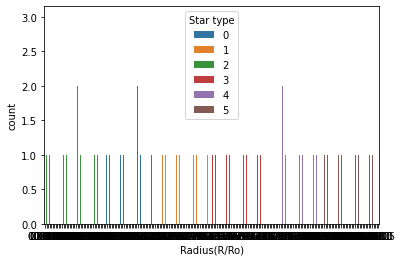

In [203]:
ax = sns.countplot(x = 'Radius(R/Ro)', data = df, hue = 'Star type')

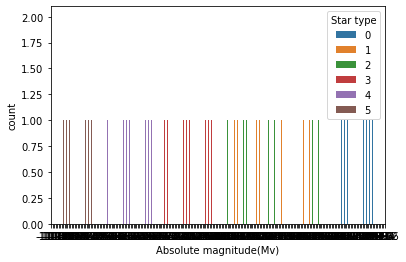

In [204]:
ax = sns.countplot(x = 'Absolute magnitude(Mv)', data = df, hue = 'Star type')

In [205]:
df['Star type'].value_counts()

0    40
1    40
2    40
3    40
4    40
5    40
Name: Star type, dtype: int64

In [206]:
# To help us calculate cramers_v from above reference.
# A 1 means highly associated, a 0 means not
def cramers_v(x, y):
    import scipy.stats as ss
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [207]:
cramers_v(df['Star type'], df['Absolute magnitude(Mv)'])

0.1707408025412262

In [208]:
cramers_v(df['Star type'], df['Radius(R/Ro)'])

0.3121814615848696

In [209]:
# Make an empty dataframe
df_cramers = pd.DataFrame(index = df.columns, columns = df.columns)

In [210]:
for col in df_cramers.columns:
    for row in df_cramers.index:
        df_cramers[col][row] = cramers_v(df[col], df[row])

<AxesSubplot:>

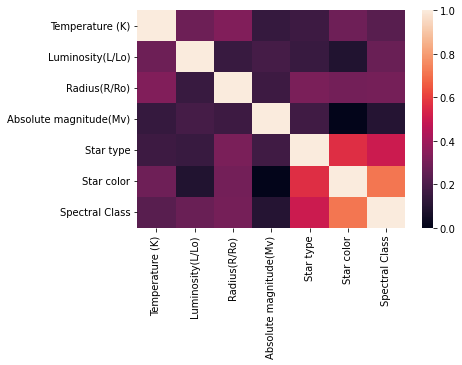

In [211]:
sns.heatmap(df_cramers.astype(float))

<AxesSubplot:>

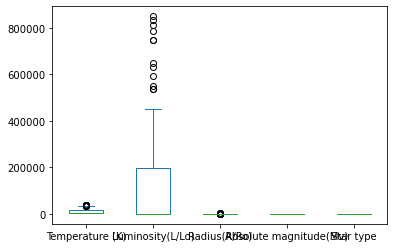

In [212]:
df.plot.box()

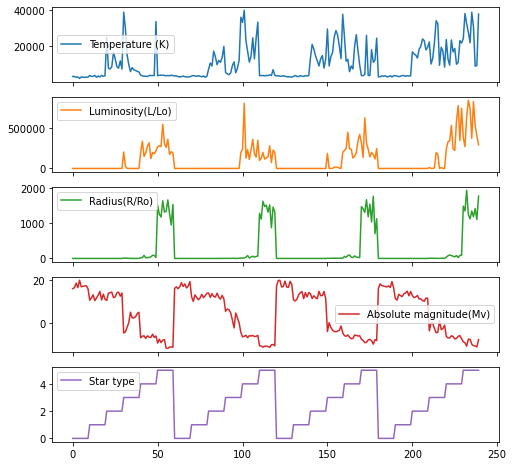

In [213]:
df.plot(subplots=True, figsize=(8, 8)); ##useful

In [214]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

for col in df.columns:
    df[col] = enc.fit(df[col]).transform(df[col])

In [215]:
df.dtypes

Temperature (K)           int64
Luminosity(L/Lo)          int64
Radius(R/Ro)              int64
Absolute magnitude(Mv)    int64
Star type                 int64
Star color                int32
Spectral Class            int32
dtype: object

In [216]:
x = df.drop(['Star type'], axis = 1) # we will use all columns except 'Star type'
y = df['Star type'] # this is our target value

In [217]:
x.shape, y.shape

((240, 6), (240,))

In [218]:
from sklearn.model_selection import train_test_split

In [219]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.80)

In [220]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((48, 6), (192, 6), (48,), (192,))

In [221]:
from sklearn.tree import DecisionTreeClassifier

In [222]:
model = DecisionTreeClassifier() # initialize our model

In [223]:
model.fit(x, y)

DecisionTreeClassifier()

In [224]:
from sklearn.metrics import accuracy_score

In [225]:
y_predictions = model.predict(x)

In [226]:
accuracy_score(y_predictions, y)

1.0

In [227]:
model.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [228]:
y_predictions = model.predict(xtest)
accuracy_score(y_predictions, ytest)

0.96875

In [229]:
tree.plot_tree(model)

NameError: name 'tree' is not defined

NameError: name 'tree' is not defined

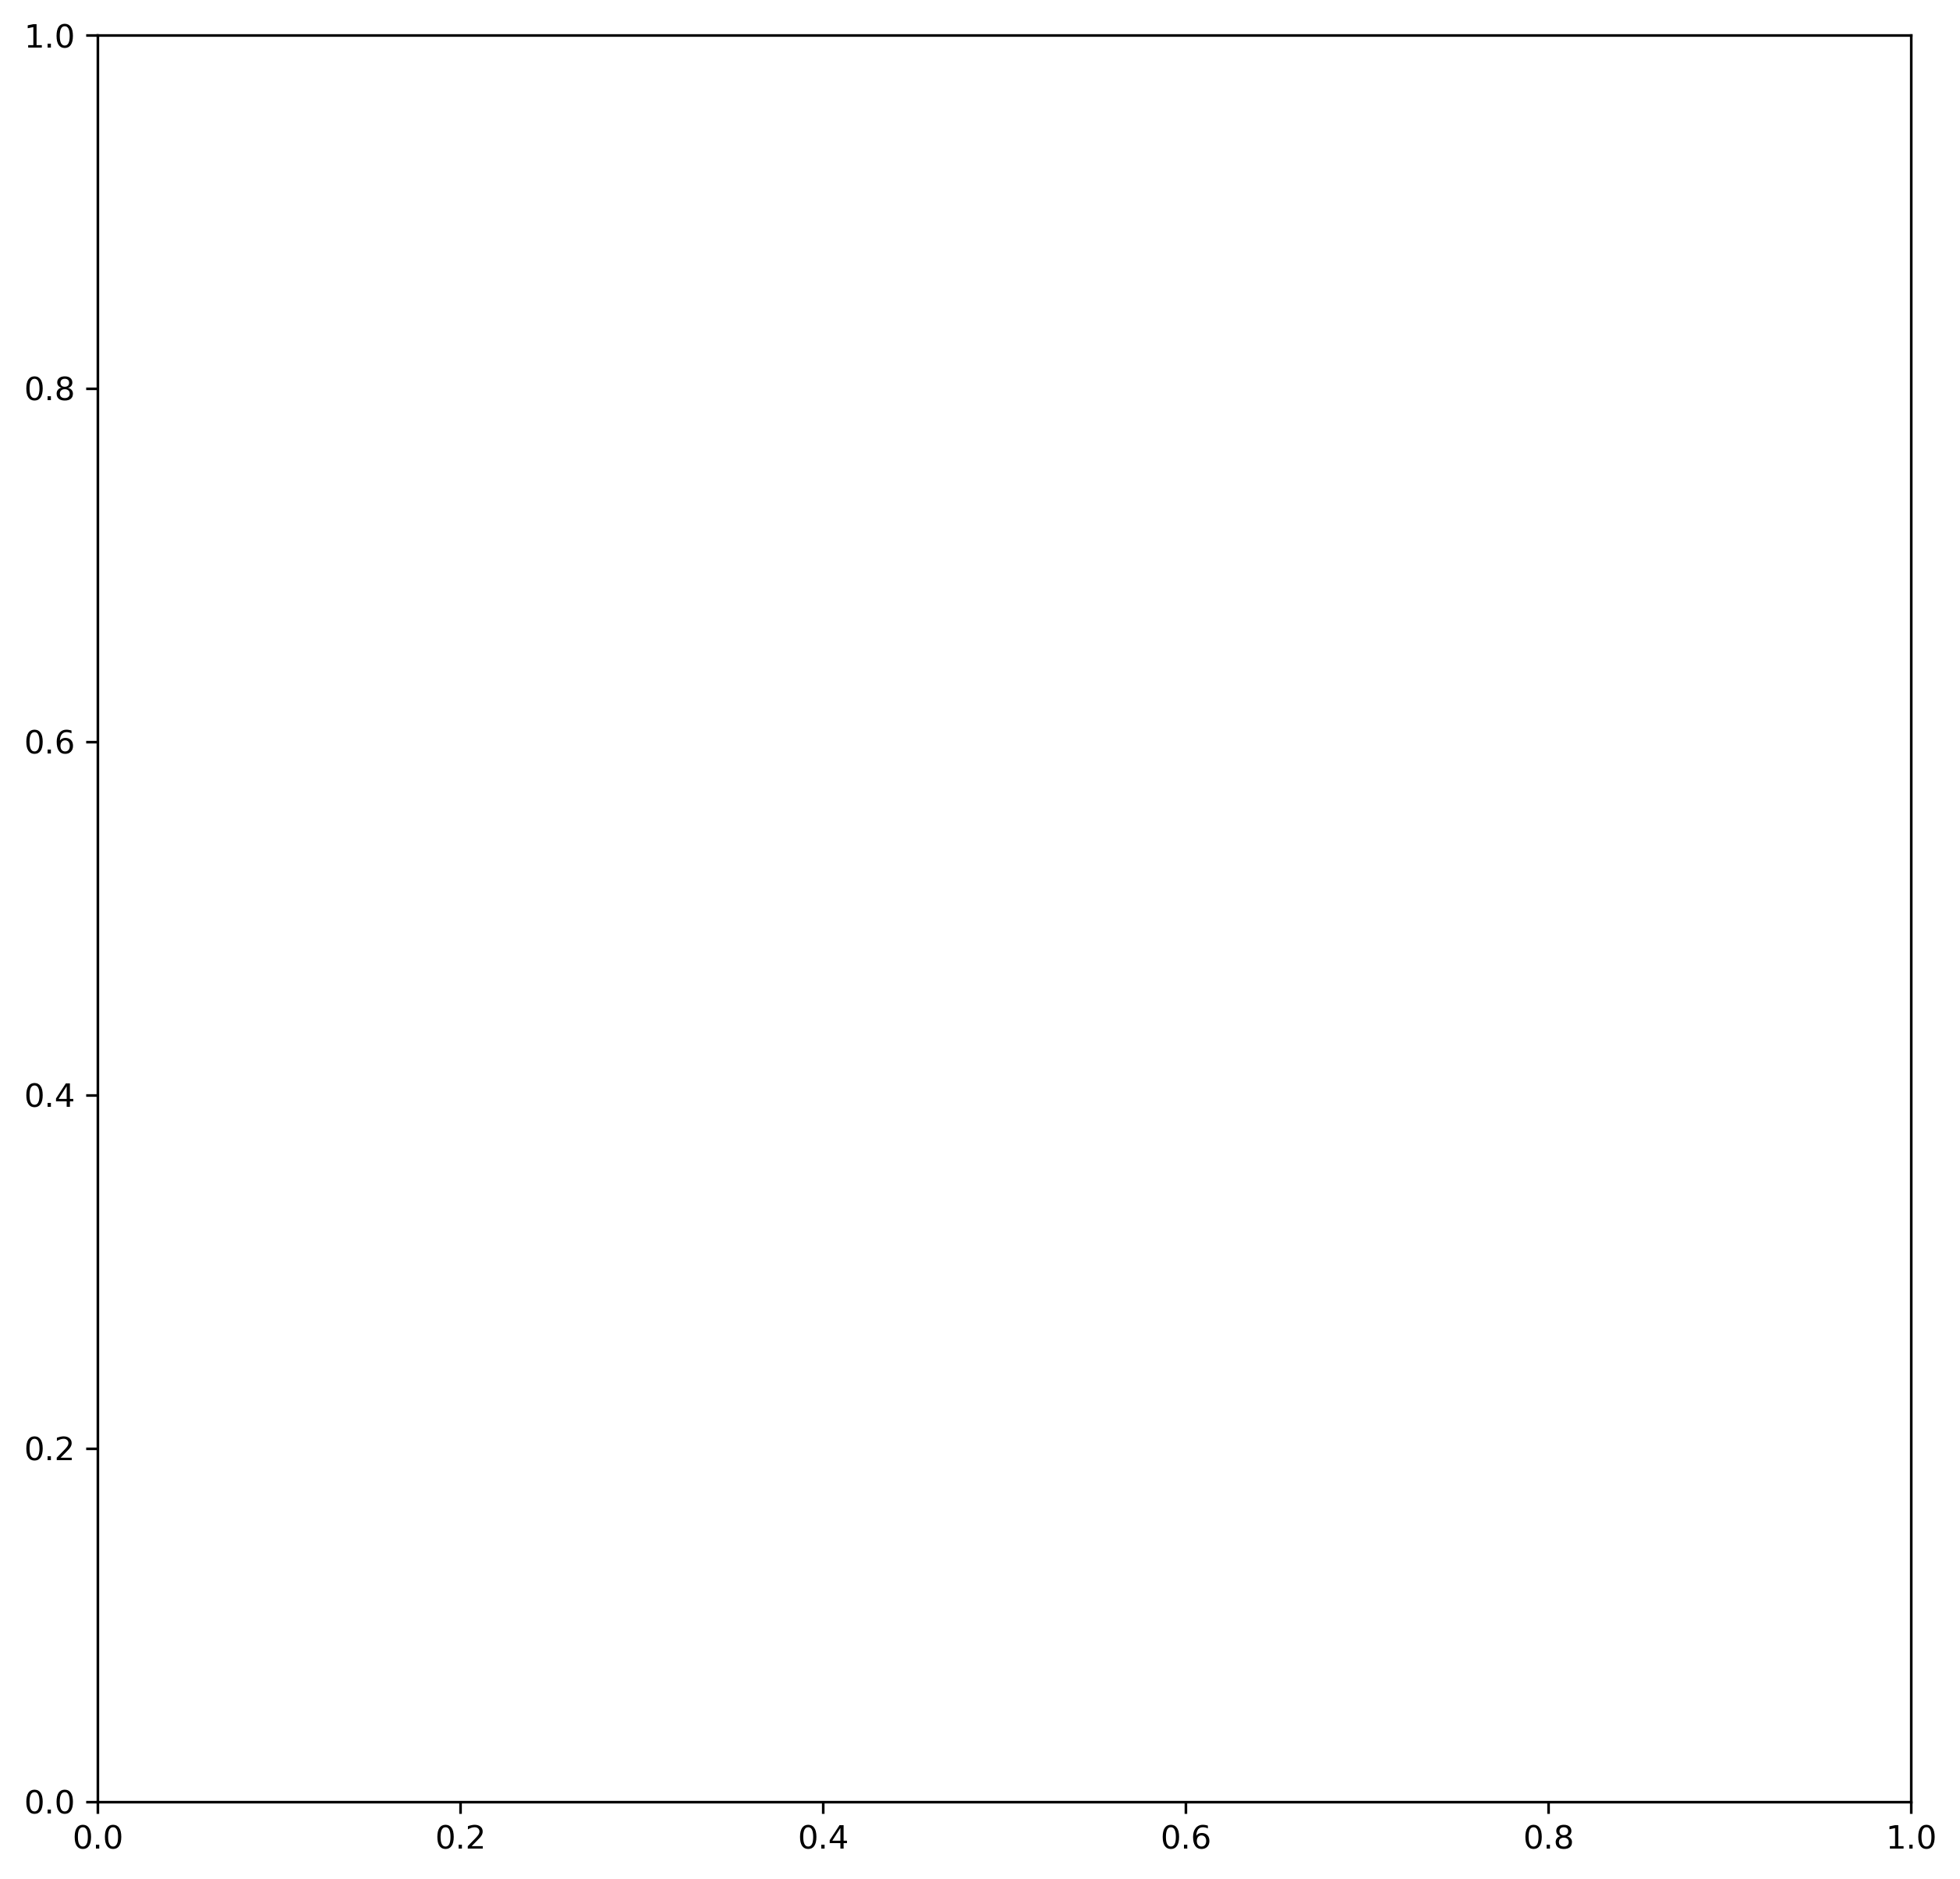

In [230]:
# Grabbed from: https://stackoverflow.com/questions/59174665/how-can-i-adjust-the-size-of-the-plot-tree-graph-in-sklearn-to-make-it-readable
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)
tree.plot_tree(model, feature_names = x.columns, filled=True);

In [231]:
from sklearn.metrics import classification_report, confusion_matrix

In [232]:
confusion_matrix(ytest, y_predictions)

array([[29,  0,  0,  0,  0,  0],
       [ 1, 30,  0,  0,  0,  0],
       [ 1,  0, 32,  0,  0,  0],
       [ 0,  0,  0, 32,  2,  0],
       [ 0,  0,  0,  0, 34,  0],
       [ 0,  0,  0,  0,  2, 29]], dtype=int64)

In [233]:
print(classification_report(ytest, y_predictions))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        29
           1       1.00      0.97      0.98        31
           2       1.00      0.97      0.98        33
           3       1.00      0.94      0.97        34
           4       0.89      1.00      0.94        34
           5       1.00      0.94      0.97        31

    accuracy                           0.97       192
   macro avg       0.97      0.97      0.97       192
weighted avg       0.97      0.97      0.97       192



In [234]:
#Random forest: obtained from https://machinelearningmastery.com/random-forest-ensemble-in-python/
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
# define the model
model = RandomForestClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=20, n_repeats=6, random_state=2)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.902 (0.039)


In [235]:
from sklearn.datasets import make_classification

In [236]:
>>> X, y = make_classification(n_samples=1000, n_features=4,
                            n_informative=2, n_redundant=0,
                               random_state=0, shuffle=True)


In [237]:
clf = RandomForestClassifier(max_depth=2, random_state=0)

In [238]:
 clf.fit(X, y)

RandomForestClassifier(max_depth=2, random_state=0)

In [239]:
>>> print(clf.predict([[0, 0, 0, 0]]))

[1]


In [248]:
## https://www.geeksforgeeks.org/ml-implementation-of-knn-classifier-using-sklearn/
## KNN algorithms and graphs
y = df['Star type']
X = df.drop('Star type', axis = 1)
## X = X.drop('Temperature (K)', axis = 1)
## X = X.drop('id', axis = 1)
# Separating the dependent and independent variable
  
X_train, X_test, y_train, y_test = train_test_split(
             X, y, test_size = 0.3, random_state = 0)
# Splitting the data into training and testing data

In [249]:
K = []
training = []
test = []
scores = {}
  
for k in range(2, 21):
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(X_train, y_train)
  
    training_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    K.append(k)
  
    training.append(training_score)
    test.append(test_score)
    scores[k] = [training_score, test_score]

In [250]:
for keys, values in scores.items():
    print(keys, ':', values)

2 : [0.9940476190476191, 0.9166666666666666]
3 : [0.9880952380952381, 0.9583333333333334]
4 : [0.9821428571428571, 0.9583333333333334]
5 : [0.9821428571428571, 0.9583333333333334]
6 : [0.9702380952380952, 0.9444444444444444]
7 : [0.9642857142857143, 0.9583333333333334]
8 : [0.9523809523809523, 0.9166666666666666]
9 : [0.9523809523809523, 0.9305555555555556]
10 : [0.9285714285714286, 0.8611111111111112]
11 : [0.9226190476190477, 0.8611111111111112]
12 : [0.9345238095238095, 0.875]
13 : [0.9345238095238095, 0.8888888888888888]
14 : [0.9345238095238095, 0.875]
15 : [0.9285714285714286, 0.875]
16 : [0.9285714285714286, 0.875]
17 : [0.9285714285714286, 0.8611111111111112]
18 : [0.9345238095238095, 0.8472222222222222]
19 : [0.9107142857142857, 0.8472222222222222]
20 : [0.9226190476190477, 0.8472222222222222]


C:\Users\winde\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


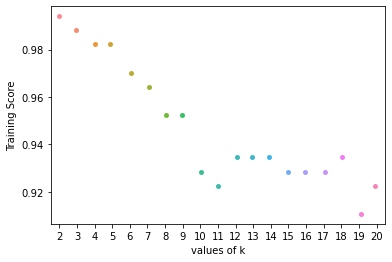

In [251]:

ax = sns.stripplot(K, training);
ax.set(xlabel ='values of k', ylabel ='Training Score')  
  
plt.show()
# function to show plot

C:\Users\winde\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


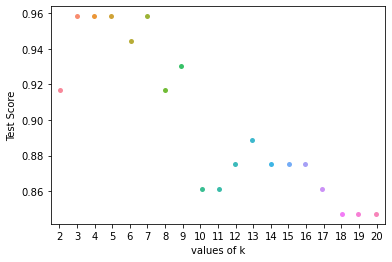

In [252]:
ax = sns.stripplot(K, test);
ax.set(xlabel ='values of k', ylabel ='Test Score')
plt.show()

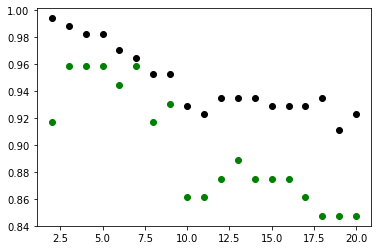

In [253]:
plt.scatter(K, training, color ='k')
plt.scatter(K, test, color ='g')
plt.show()
# For overlapping scatter plots